# Explore here

In [65]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
#Busco duplicados
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


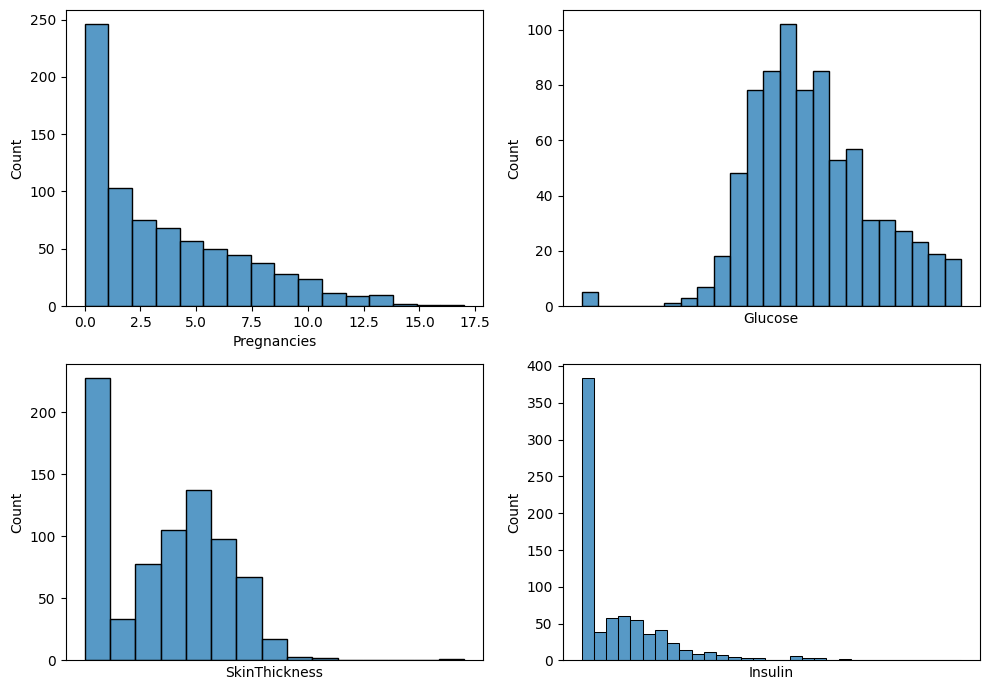

In [68]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = df, x = "Pregnancies")
sns.histplot(ax = axis[0,1], data = df, x = "Glucose").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "SkinThickness").set_xticks([])
sns.histplot(ax = axis[1,1], data = df, x = "Insulin").set_xticks([])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


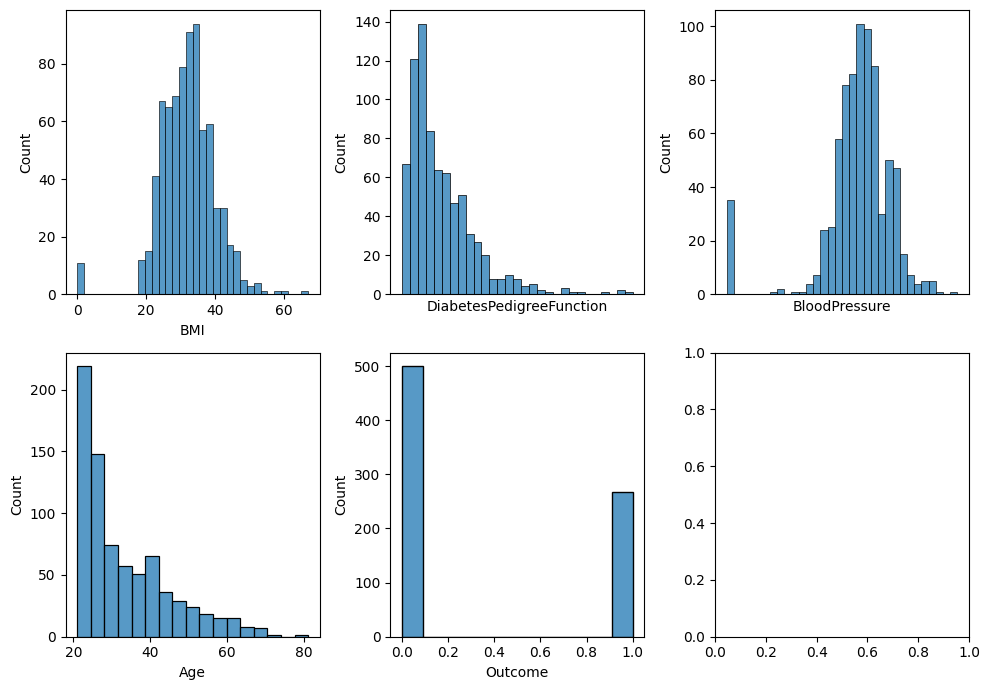

In [69]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = df, x = "BMI")
sns.histplot(ax = axis[0,1], data = df, x = "DiabetesPedigreeFunction").set_xticks([])
sns.histplot(ax = axis[0,2], data = df, x = "BloodPressure").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "Age")
sns.histplot(ax = axis[1,1], data = df, x = "Outcome")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



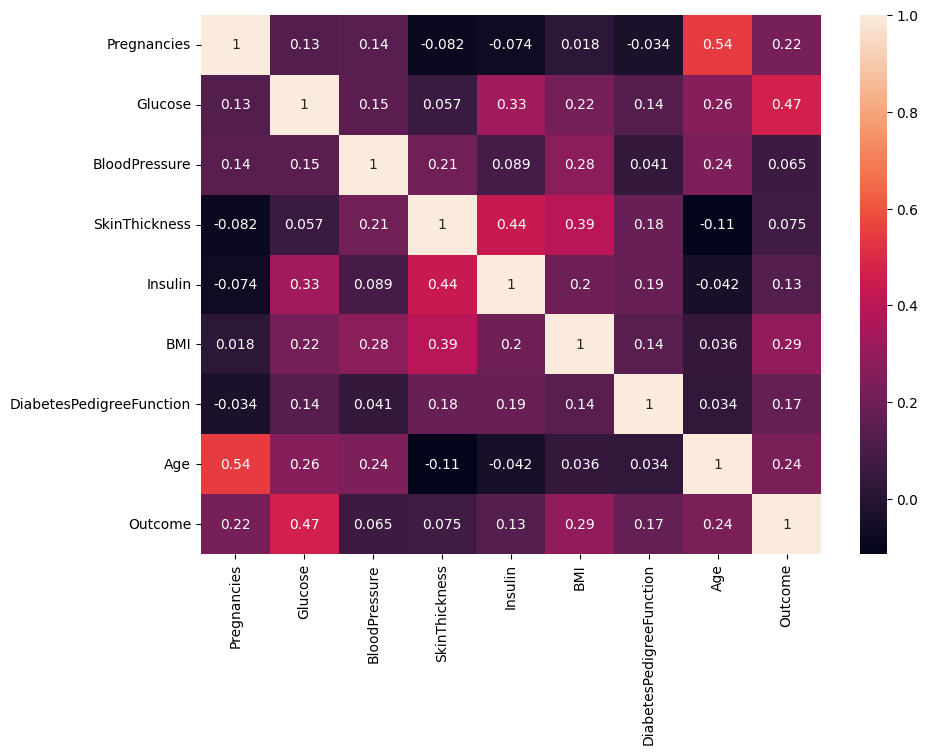

In [70]:


fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [71]:
#remuevo las columnas que no me sirven con corelaciones bajas
df.drop(["BloodPressure", "SkinThickness", "Insulin","DiabetesPedigreeFunction"], axis = 1, inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BMI          768 non-null    float64
 3   Age          768 non-null    int64  
 4   Outcome      768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


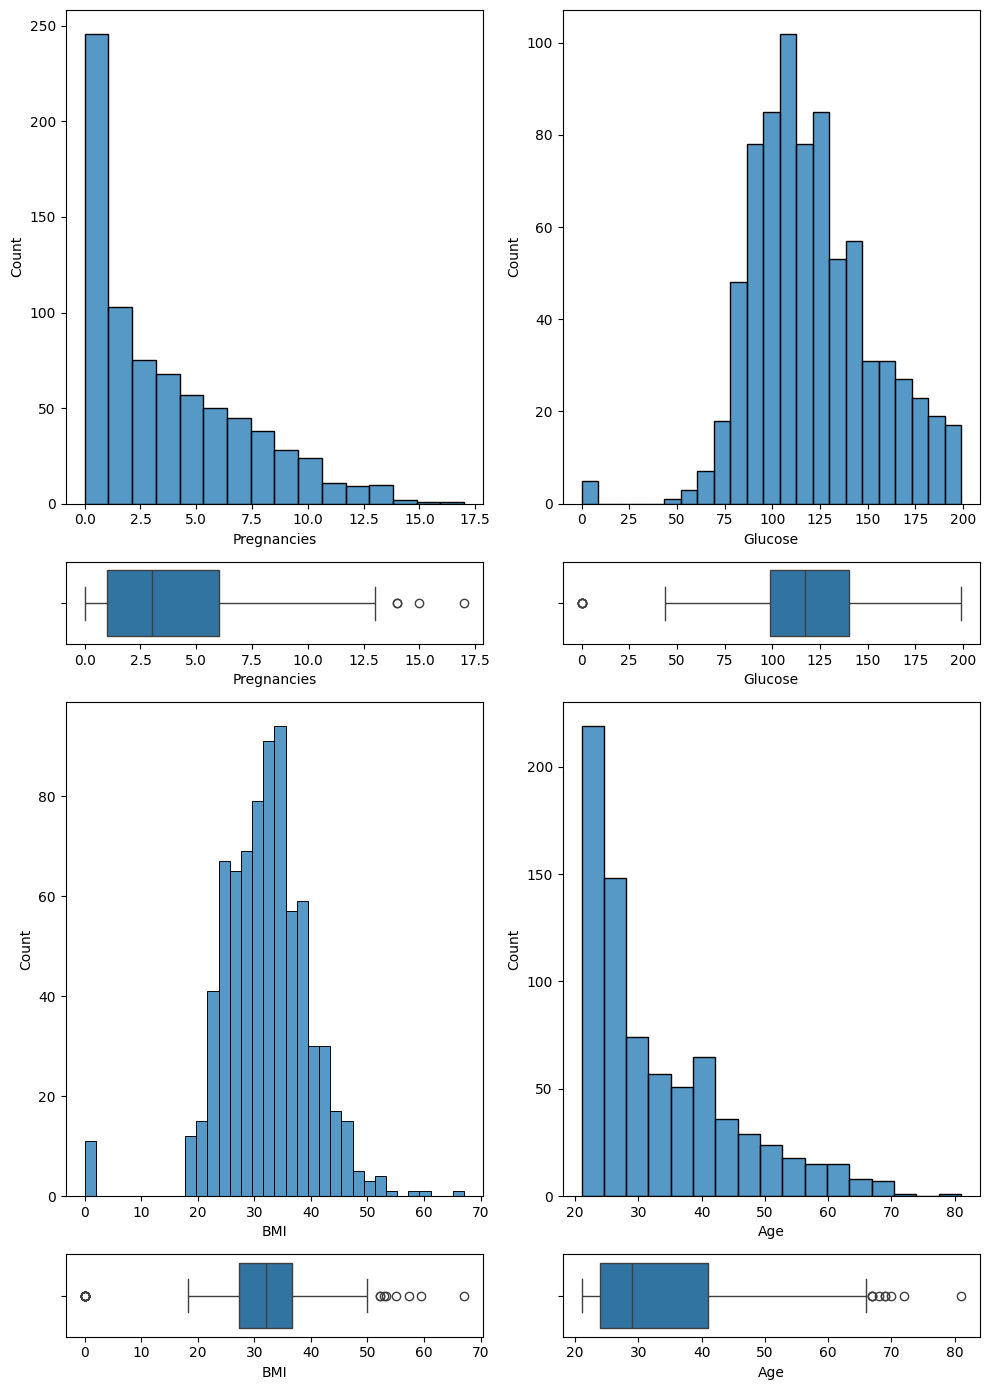

In [73]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = df, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = df, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = df, x = "Glucose")

sns.histplot(ax = axis[2, 0], data = df, x = "BMI")
sns.boxplot(ax = axis[3, 0], data = df, x = "BMI")

sns.histplot(ax = axis[2,1], data = df, x = "Age")
sns.boxplot(ax = axis[3, 1], data = df, x = "Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
#Busco outliers

pregnancies_stats=df["Pregnancies"].describe()
pregnancies_stats

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [75]:
iqr=pregnancies_stats["75%"]-pregnancies_stats["25%"]
upper_limit=pregnancies_stats["75%"]+1.5*iqr
lower_limit=pregnancies_stats["25%"]-1.5*iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(iqr, 2)}")

The upper and lower limits for finding outliers are 13.5 and -6.5, with an interquartile range of 5.0


In [76]:
#clean outliers
df=df[(df["Pregnancies"] < upper_limit)]

In [77]:
glucose_stats=df["Glucose"].describe()
glu_iqr=glucose_stats["75%"]-glucose_stats["25%"]
upper_limit=glucose_stats["75%"]+1.5*iqr
lower_limit=glucose_stats["25%"]-1.5*iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(glu_iqr, 2)}")

The upper and lower limits for finding outliers are 147.5 and 91.5, with an interquartile range of 41.0


In [78]:
df=df[(df["Glucose"] > 50)]

In [79]:
bmi_stats=df["BMI"].describe()
bmi_iqr=bmi_stats["75%"]-bmi_stats["25%"]
upper_limit=bmi_stats["75%"]+1.5*iqr
lower_limit=bmi_stats["25%"]-1.5*iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 44.0 and 19.8, with an interquartile range of 9.2


In [80]:
df=df[(df["BMI"] < 55) & (df["BMI"] > 18)]

In [81]:
age_stats=df["Age"].describe()
age_iqr=age_stats["75%"]-age_stats["25%"]
upper_limit=age_stats["75%"]+1.5*iqr
lower_limit=age_stats["25%"]-1.5*iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 48.5 and 16.5, with an interquartile range of 17.0


In [82]:
df=df[(df["Age"] < 70)]

In [83]:
df.isnull().sum().sort_values(ascending = False)

Pregnancies    0
Glucose        0
BMI            0
Age            0
Outcome        0
dtype: int64

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)
columnas=X_train.columns

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = columnas)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = columnas)

X_train_sel.head()

/home/leo/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=7 is greater than n_features=4. All the features will be returned.
  warnings.warn(


,Pregnancies,Glucose,BMI,Age
0,3.0,111.0,30.1,30.0
1,2.0,98.0,34.7,22.0
2,4.0,131.0,33.1,28.0
3,8.0,120.0,25.0,64.0
4,10.0,108.0,32.4,42.0


In [85]:
X_test_sel.head()

,Pregnancies,Glucose,BMI,Age
0,1.0,117.0,34.5,40.0
1,2.0,139.0,25.6,29.0
2,3.0,99.0,21.8,26.0
3,5.0,99.0,34.0,30.0
4,1.0,95.0,35.0,43.0


In [86]:
#Guardo los datos
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [87]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,3.0,111.0,30.1,30.0,0
1,2.0,98.0,34.7,22.0,0
2,4.0,131.0,33.1,28.0,0
3,8.0,120.0,25.0,64.0,0
4,10.0,108.0,32.4,42.0,1


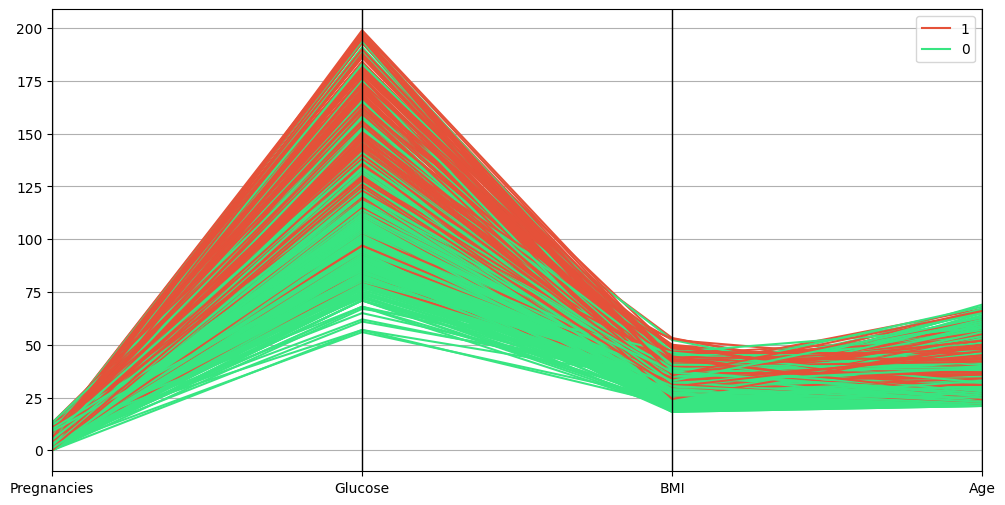

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E55139", "#38E581", "#8139E5"))

plt.show()

In [89]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]


In [90]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

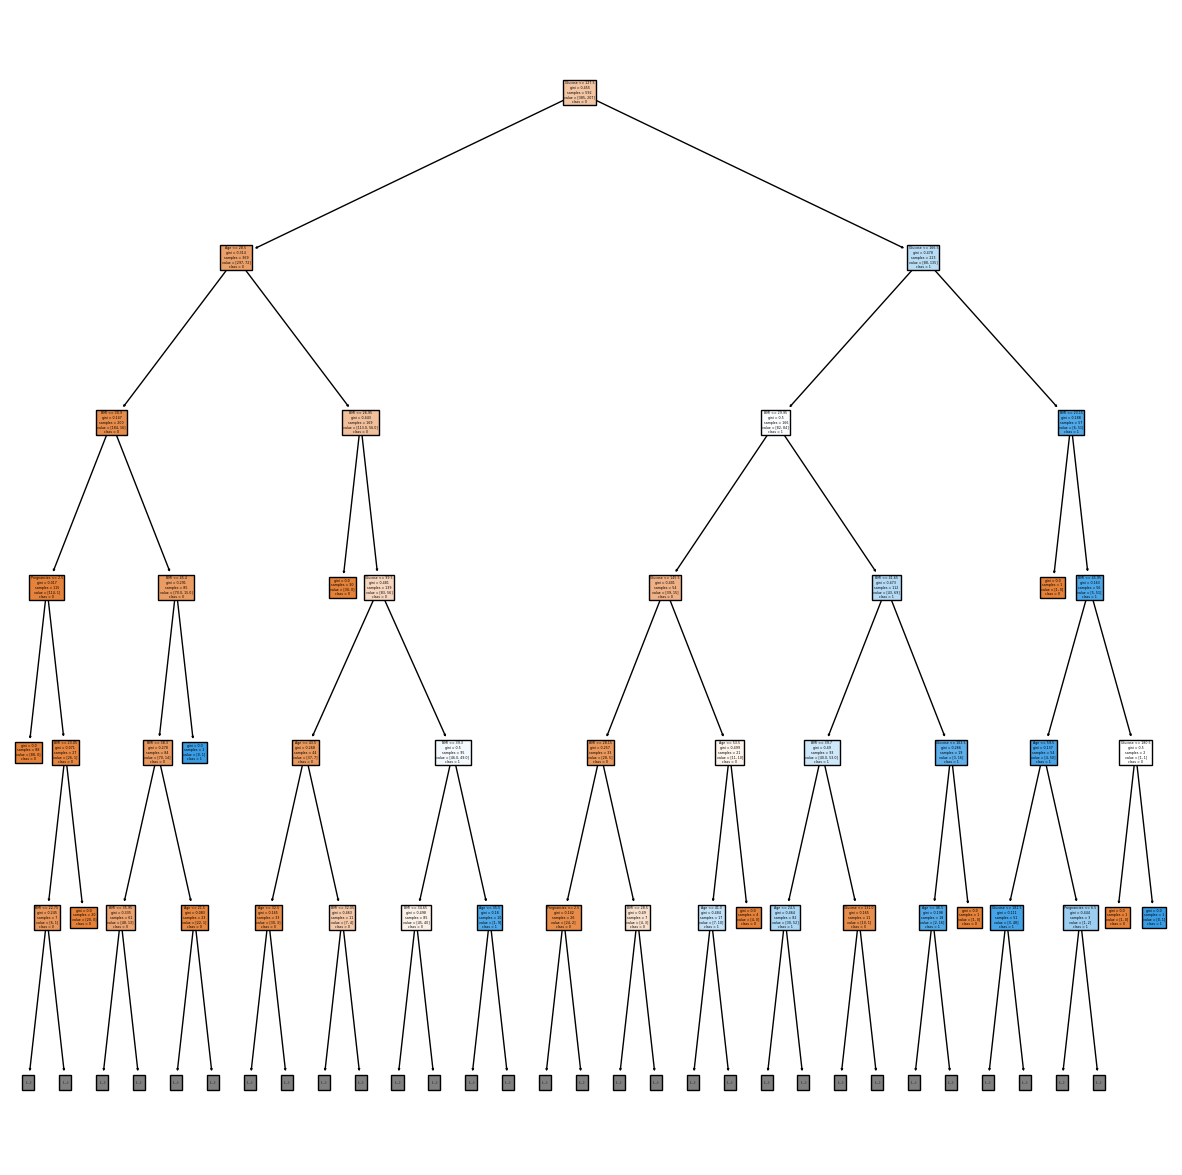

In [91]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True, max_depth=5)

plt.show()


In [92]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7162162162162162

In [140]:
from sklearn.model_selection import GridSearchCV

## Optimización

rf_grid = {"criterion": ["gini", "entropy"],
           "max_depth": [10,12,30,50],
           "min_samples_split": [10,12,14,20,25],
           "min_samples_leaf": [2,4,6,10],
           "max_features": [1,5,10,50,100]}

### RandomizedSearchCV

gd_model = GridSearchCV(DecisionTreeClassifier(),
                              param_grid=rf_grid,
                              scoring = "neg_root_mean_squared_error",
                              n_jobs= -1,
                              cv=5,
                              verbose=True)

## Entrenamiento
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 30, 50],
                         'max_features': [1, 5, 10, 50, 100],
                         'min_samples_leaf': [2, 4, 6, 10],
                         'min_samples_split': [10, 12, 14, 20, 25]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [141]:
gd_model.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 10}

In [150]:
y_pred = gd_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [151]:
accuracy_score(y_test, y_pred)

0.7635135135135135

In [160]:
modelo_ideal = DecisionTreeClassifier(criterion= 'entropy',
                                       max_depth= 50,
                                       max_features= 1,
                                       min_samples_leaf= 6,
                                       min_samples_split= 10)
modelo_ideal.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features=1,
                       min_samples_leaf=6, min_samples_split=10)

In [161]:
y_pred = modelo_ideal.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [162]:
accuracy_score(y_test, y_pred)

0.75

In [163]:
#Guardamos el modelo optimizado
from pickle import dump

dump(modelo_ideal, open("../models/tree_classifier_optimized.sav", "wb"))